# Proyecto 1: Analítica computacional para la toma de decisiones
Carolina Rodríguez

Gabriela Martínez

Wilmar Calderón

Tarea 2: Alistamiento de Datos

In [288]:
#Importation of all the relevant Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [289]:
#Reading of the comma delimited text
df=pd.read_csv('.\\data.txt')

In [290]:
#Preliminary view of the data (top 5 registers)
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [291]:
#Statistical description of all the variables
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [292]:
## Study to determine if there are duplicates or null values.
    # no. of duplicates 
duplicates = len(df[df.duplicated()])
    # no of missing values
missing_values = df.isnull().sum().sum()

## Review of the varibles types.
# Data types in dataset
types = df.dtypes.value_counts()

In [293]:
#Print of the results: definition of duplicate numbers, missing values, number of registers and features (rows x columns)
print('Number of Duplicate Entries: %d'%(duplicates))
print('Number of Missing Values: %d'%(missing_values))
print('Number of Features: %d'%(df.shape[1]))
print('Number of Registers: %d'%(df.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Number of Duplicate Entries: 0
Number of Missing Values: 506
Number of Features: 15
Number of Registers: 1197
Data Types and Frequency in Dataset:
float64    6
int64      5
object     4
Name: count, dtype: int64


In [294]:
#Identification of the column that has null values
cols=df.columns.values
for col in cols:
    if (df[col].isnull().sum()>0):
        print(col)

wip


*wip:* Trabajo en progreso. Incluye la cantidad de elementos sin terminar.

In [295]:
#Indexation of the rows where wip is null and the incentive is 0. Incentive>0 for wip==null identified as outliers
dropable=df[(df['wip'].isnull()) & (df['incentive']>0)]
print(dropable.index.values)
#Dropping of the rows with outlier
df_fin=df
df_fin.iloc[dropable.index.values,8]=df.iloc[dropable.index.values,9]
df_fin.iloc[dropable.index.values,9]=0

print(df.tail(60))
#modification of null to 0 in the wip. From the variable characteristic, as it relates to the missing products to be finished, 
#an empty value would be considered as 0.
df_fin['wip'].fillna(0, inplace=True)

[1128 1129 1130 1133 1137 1138 1139 1143 1148 1149]
           date   quarter department        day  team  targeted_productivity  \
1137   3/9/2015  Quarter2  finishing     Monday     3                   0.80   
1138   3/9/2015  Quarter2  finishing     Monday     4                   0.75   
1139   3/9/2015  Quarter2  finishing     Monday     1                   0.75   
1140   3/9/2015  Quarter2     sweing     Monday     9                   0.75   
1141   3/9/2015  Quarter2     sweing     Monday     2                   0.70   
1142   3/9/2015  Quarter2     sweing     Monday    10                   0.70   
1143   3/9/2015  Quarter2  finishing     Monday     2                   0.70   
1144   3/9/2015  Quarter2     sweing     Monday     6                   0.65   
1145   3/9/2015  Quarter2     sweing     Monday     8                   0.65   
1146   3/9/2015  Quarter2     sweing     Monday     5                   0.60   
1147   3/9/2015  Quarter2     sweing     Monday     7               

C:\Users\gabby\AppData\Local\Temp\ipykernel_6260\356734850.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [296]:
# review for no of missing values
missing_values = df_fin.isnull().sum().sum()
print('Number of Missing Values: %d'%(missing_values))

Number of Missing Values: 0


In [297]:
#Update of the datatypes of the dataframe. Date: datetime, no_of_workers: int, department is cleared from any space to avoid multiple categories.
df_fin['date']= pd.to_datetime(df_fin['date'])
df_fin['no_of_workers']=df_fin['no_of_workers'].astype(int)
df_fin['department'] = df_fin['department'].str.strip()

In [298]:
#Print details of the variables
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

Tarea 3: Exploración de Datos

In [ ]:
#description of the loaded data (null values eliminated)
df_fin.describe()

['targeted_productivity' 'smv' 'wip' 'over_time' 'incentive' 'idle_time'
 'idle_men' 'no_of_style_change' 'no_of_workers' 'actual_productivity']


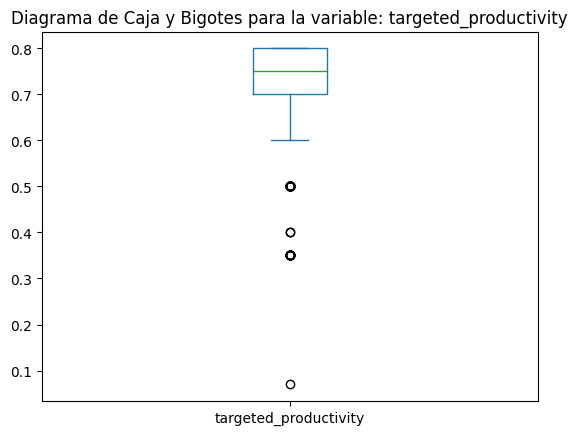

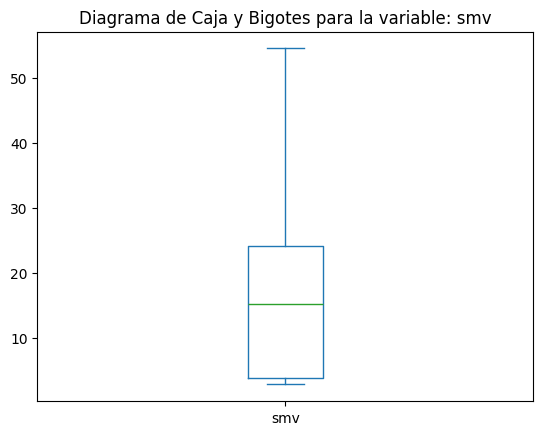

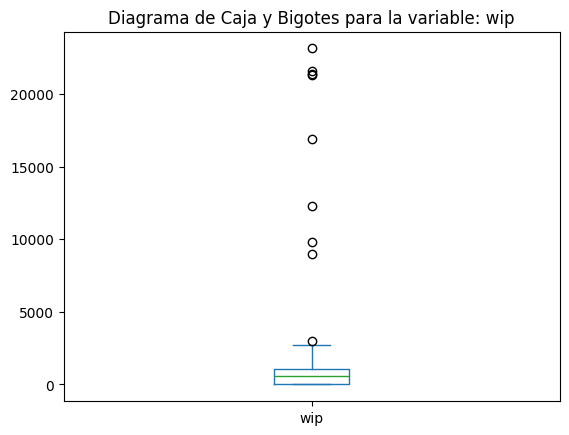

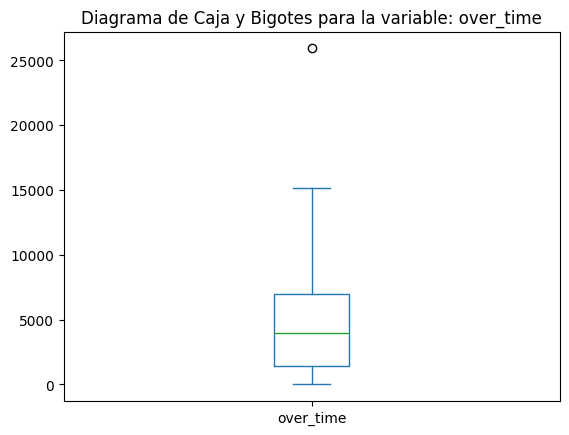

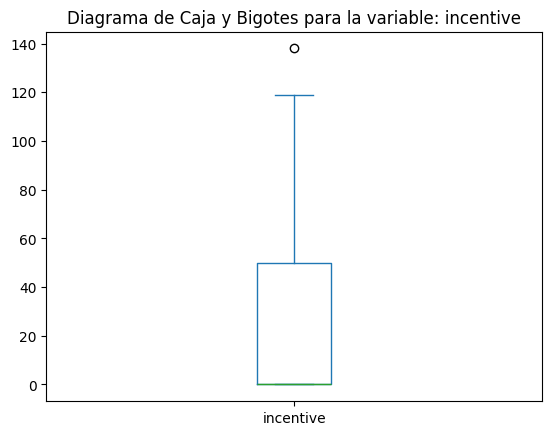

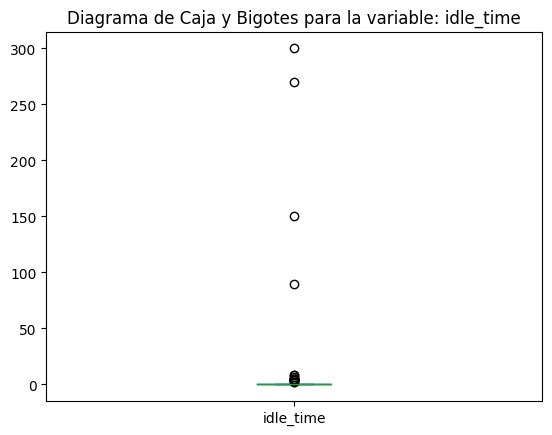

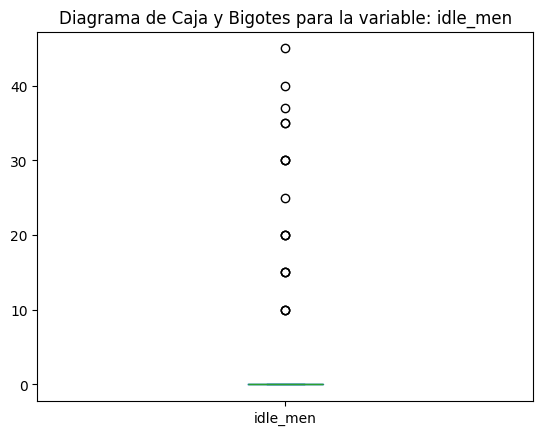

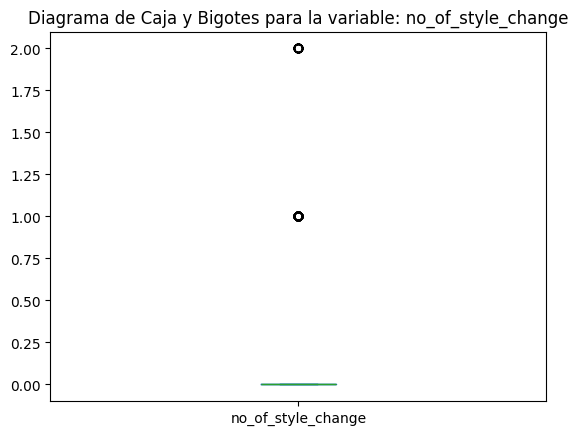

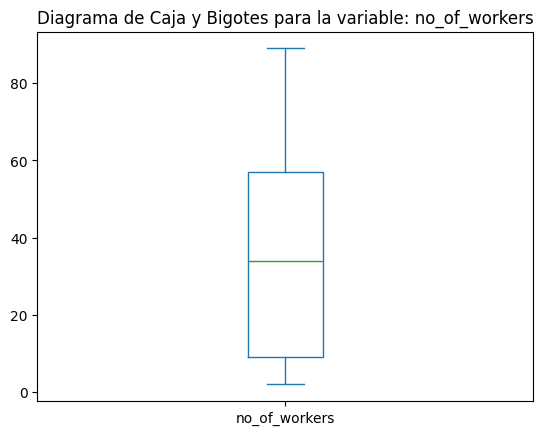

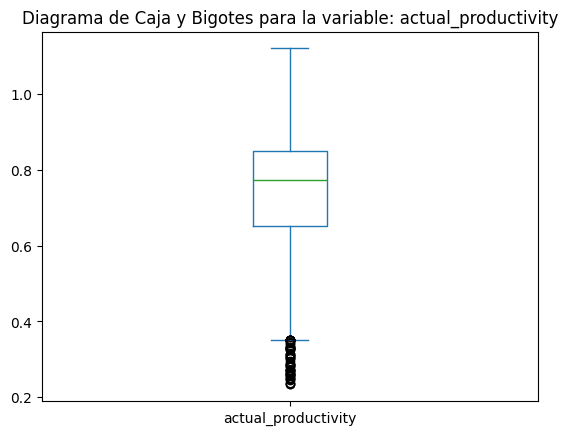

In [299]:
#creation of the box-whiskers plots for the numerical variables.
cols=df_fin.columns.values
cols=np.delete(cols,[0,1,2,3,4])
print(cols)
for col in cols:
    plt.figure()
    df_fin[col].plot(kind="box")
    plt.title("Diagrama de Caja y Bigotes para la variable: "+col)

In [300]:
#Groupby the date (day) to understand how different variables changes during time
daily_data=df_fin.groupby("date")

<Axes: xlabel='date'>

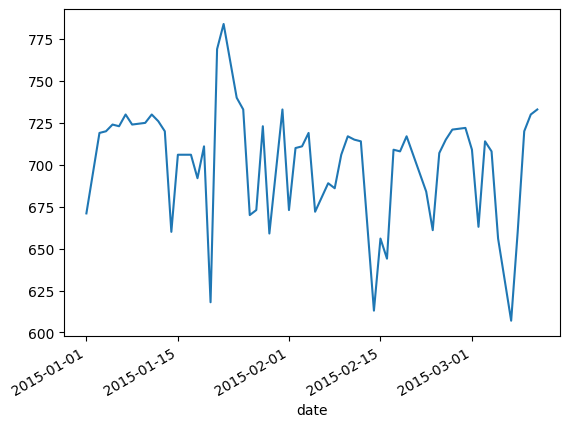

In [301]:
#review of quantity of workers during the time lapse studied
no_of_work=daily_data.sum()['no_of_workers']
no_of_work.plot()

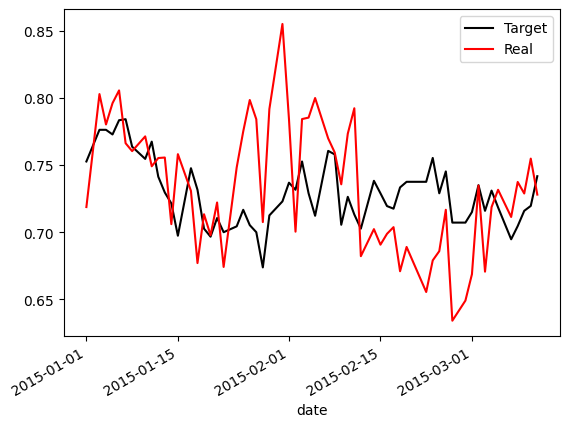

In [302]:
#comparisson between the targeted and the real productivity in the dates studied
target_eff=daily_data['targeted_productivity'].mean()
real_eff=daily_data['actual_productivity'].mean()
plt.figure()
target_eff.plot(c="black", label="Target")
real_eff.plot(c="red", label="Real")
plt.legend()
plt.show()

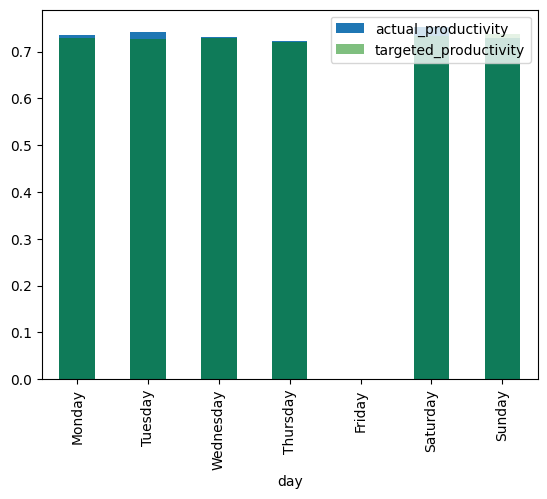

In [303]:
#Review of efficiencies during the week days (average efficiencies)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekly_data=df_fin.groupby("day")
real_eff_w=weekly_data['actual_productivity'].mean().reindex(cats)
target_eff_w=weekly_data['targeted_productivity'].mean().reindex(cats)

plt.figure()
real_eff_w.plot(kind="bar")
target_eff_w.plot(kind="bar",color="green",alpha=0.5)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Number of activities performed')

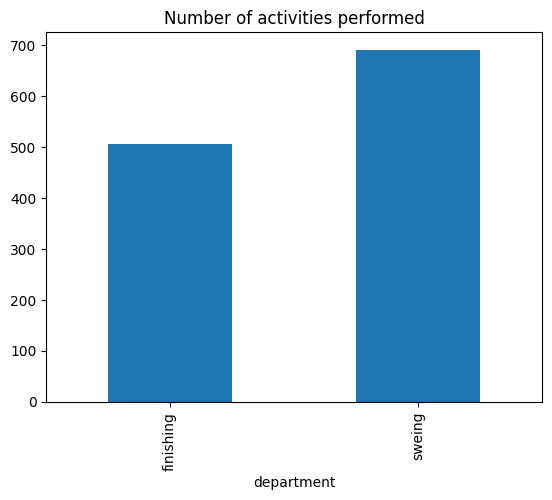

In [304]:
#comparisson of registers from the different activities performed
tasks=df_fin.groupby("department").count()

plt.figure()
tasks["team"].plot(kind="bar")
plt.title("Number of activities performed")

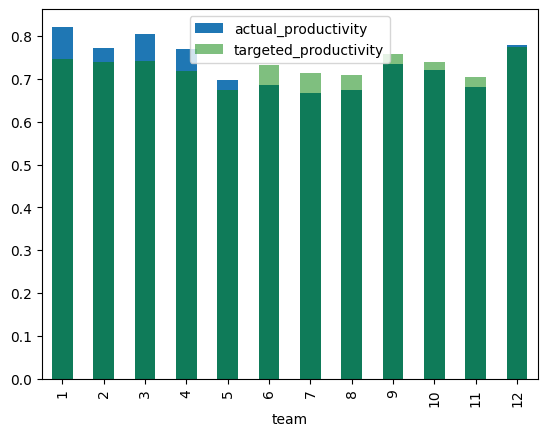

In [305]:
#Review of efficiencies during the week days (average efficiencies)

team_data=df_fin.groupby("team")
real_eff_t=team_data['actual_productivity'].mean()
target_eff_t=team_data['targeted_productivity'].mean()

plt.figure()
real_eff_t.plot(kind="bar")
target_eff_t.plot(kind="bar",color="green",alpha=0.5)
plt.legend()
plt.show()

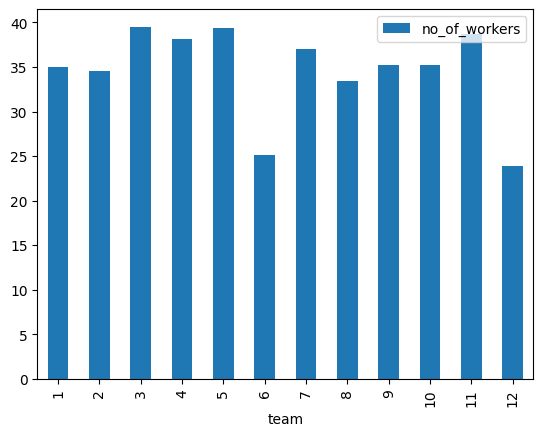

In [306]:
#Review of efficiencies during the week days (average efficiencies)

team_data=df_fin.groupby("team")
real_eff_t=team_data['no_of_workers'].mean()

plt.figure()
real_eff_t.plot(kind="bar")
plt.legend()
plt.show()

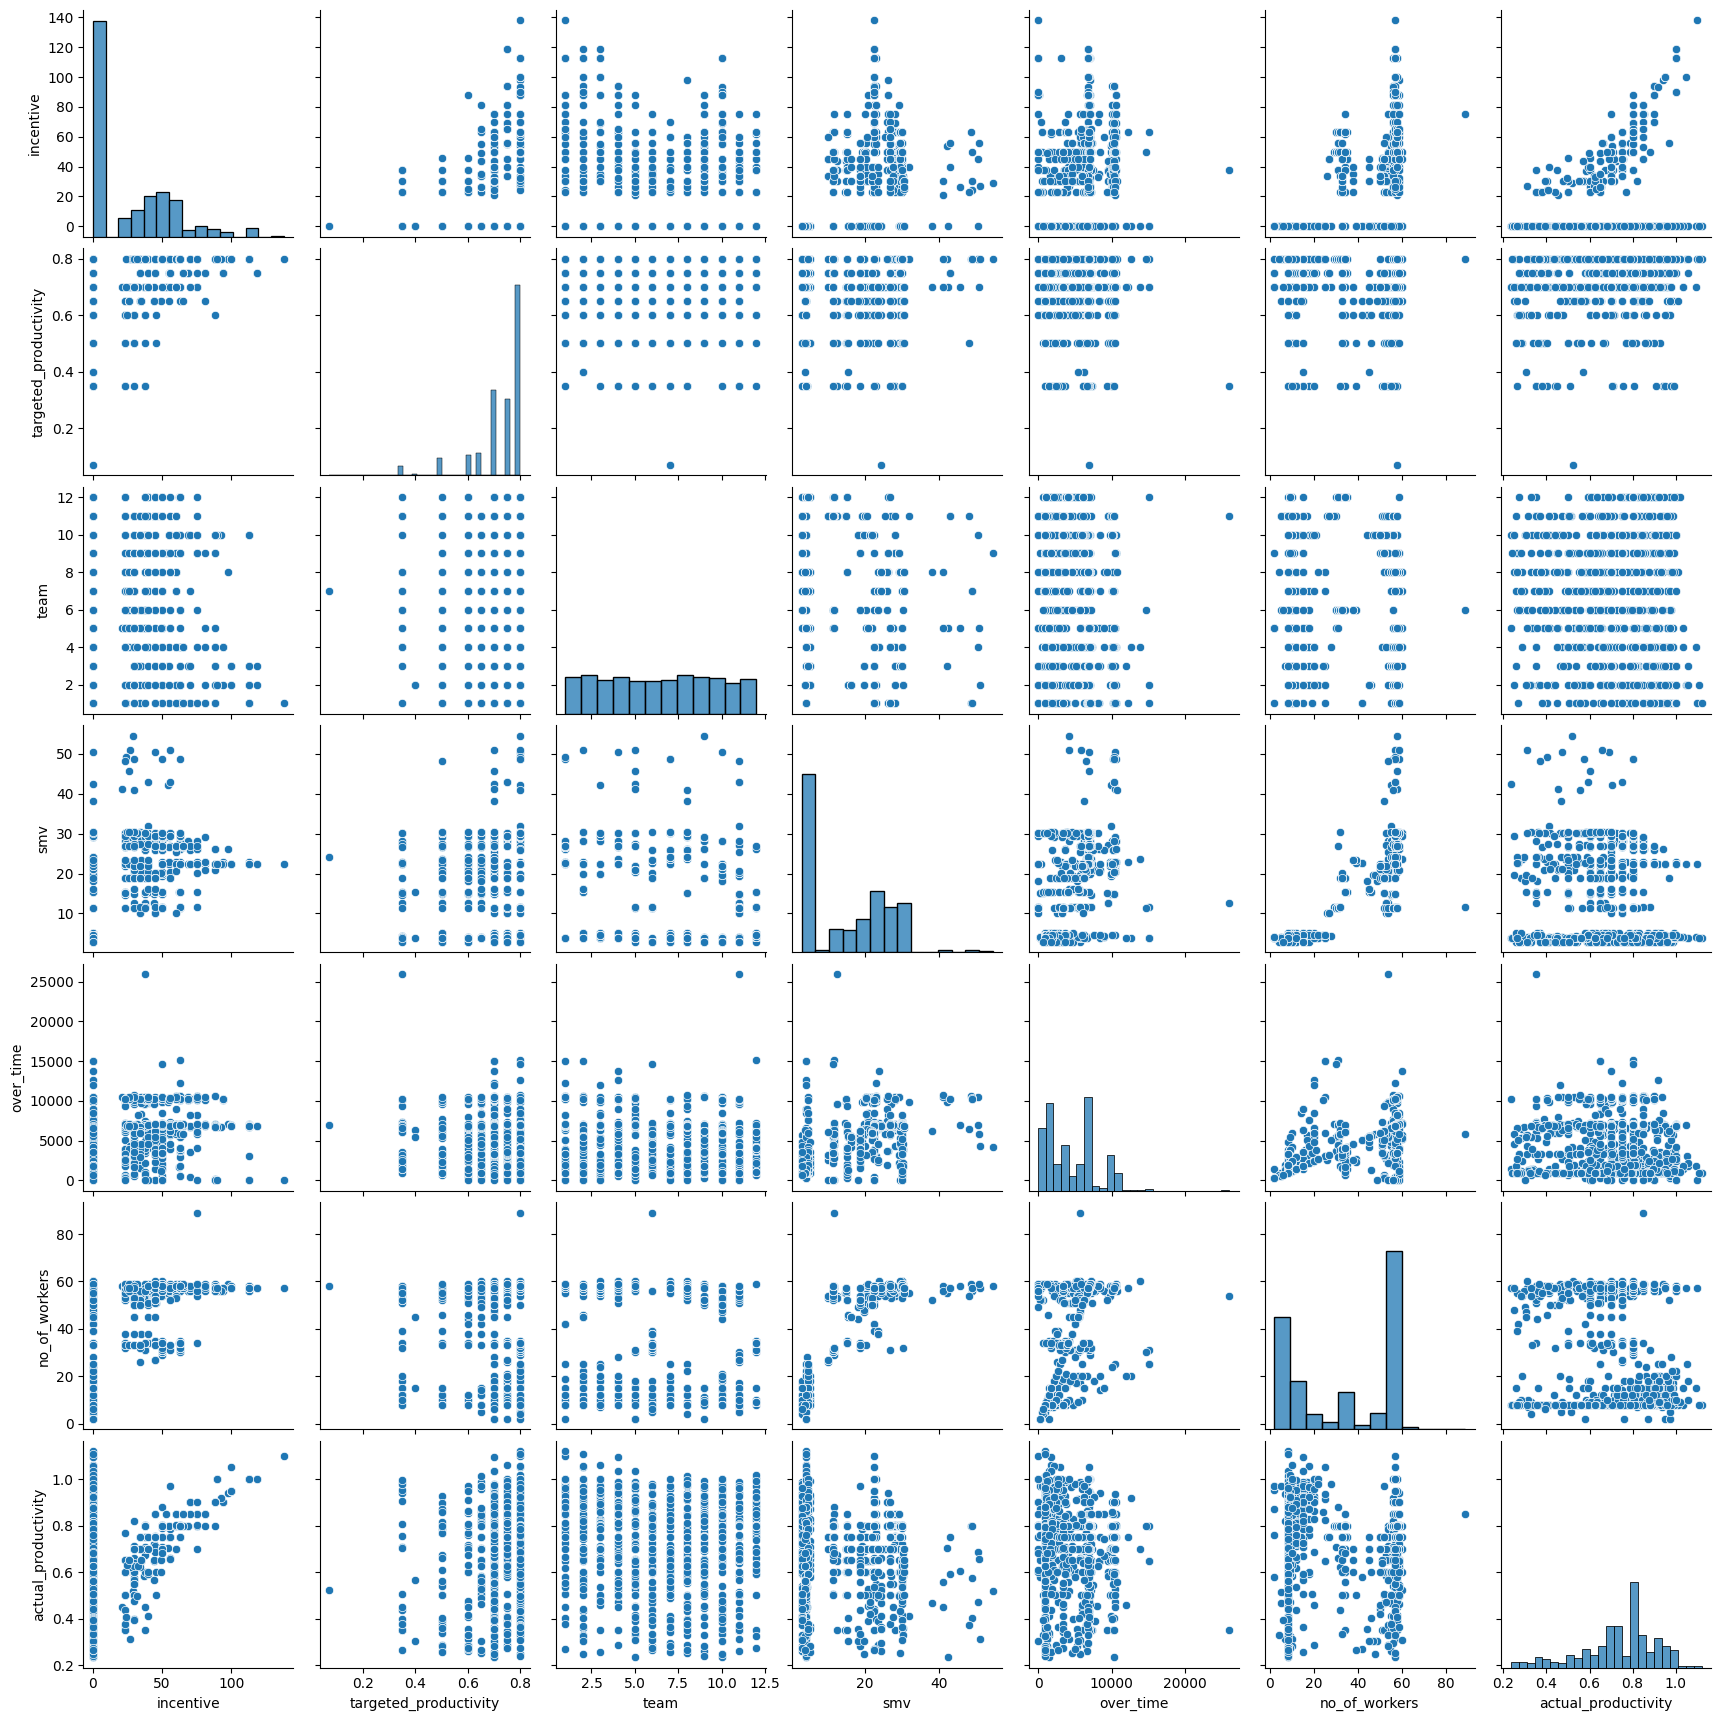

In [371]:
import seaborn as sns
df_val=df_fin.select_dtypes(exclude=['object'])
sns.pairplot(df_val[['incentive','targeted_productivity','team', 'smv','over_time','no_of_workers','actual_productivity']])

In [308]:
df_sweing = df_fin[df_fin['department'] == 'sweing']
df_val_sweing=df_sweing.select_dtypes(exclude=['object'])

In [309]:
df_finishing=df_fin[df_fin['department'] == 'finishing']
df_val_finishing=df_finishing.select_dtypes(exclude=['object'])

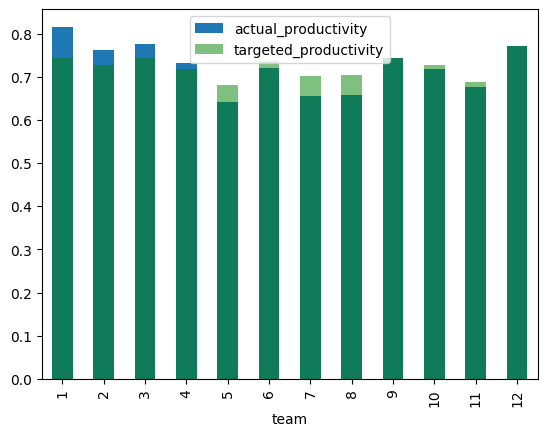

In [332]:
team_data=df_sweing.groupby("team")
real_eff_t=team_data['actual_productivity'].mean()
target_eff_t=team_data['targeted_productivity'].mean()

plt.figure()
real_eff_t.plot(kind="bar")
target_eff_t.plot(kind="bar",color="green",alpha=0.5)
plt.legend()
plt.show()

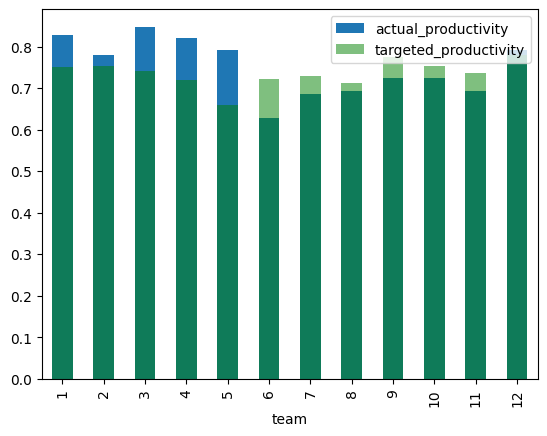

In [331]:
team_data=df_finishing.groupby("team")
real_eff_t=team_data['actual_productivity'].mean()
target_eff_t=team_data['targeted_productivity'].mean()

plt.figure()
real_eff_t.plot(kind="bar")
target_eff_t.plot(kind="bar",color="green",alpha=0.5)
plt.legend()
plt.show()

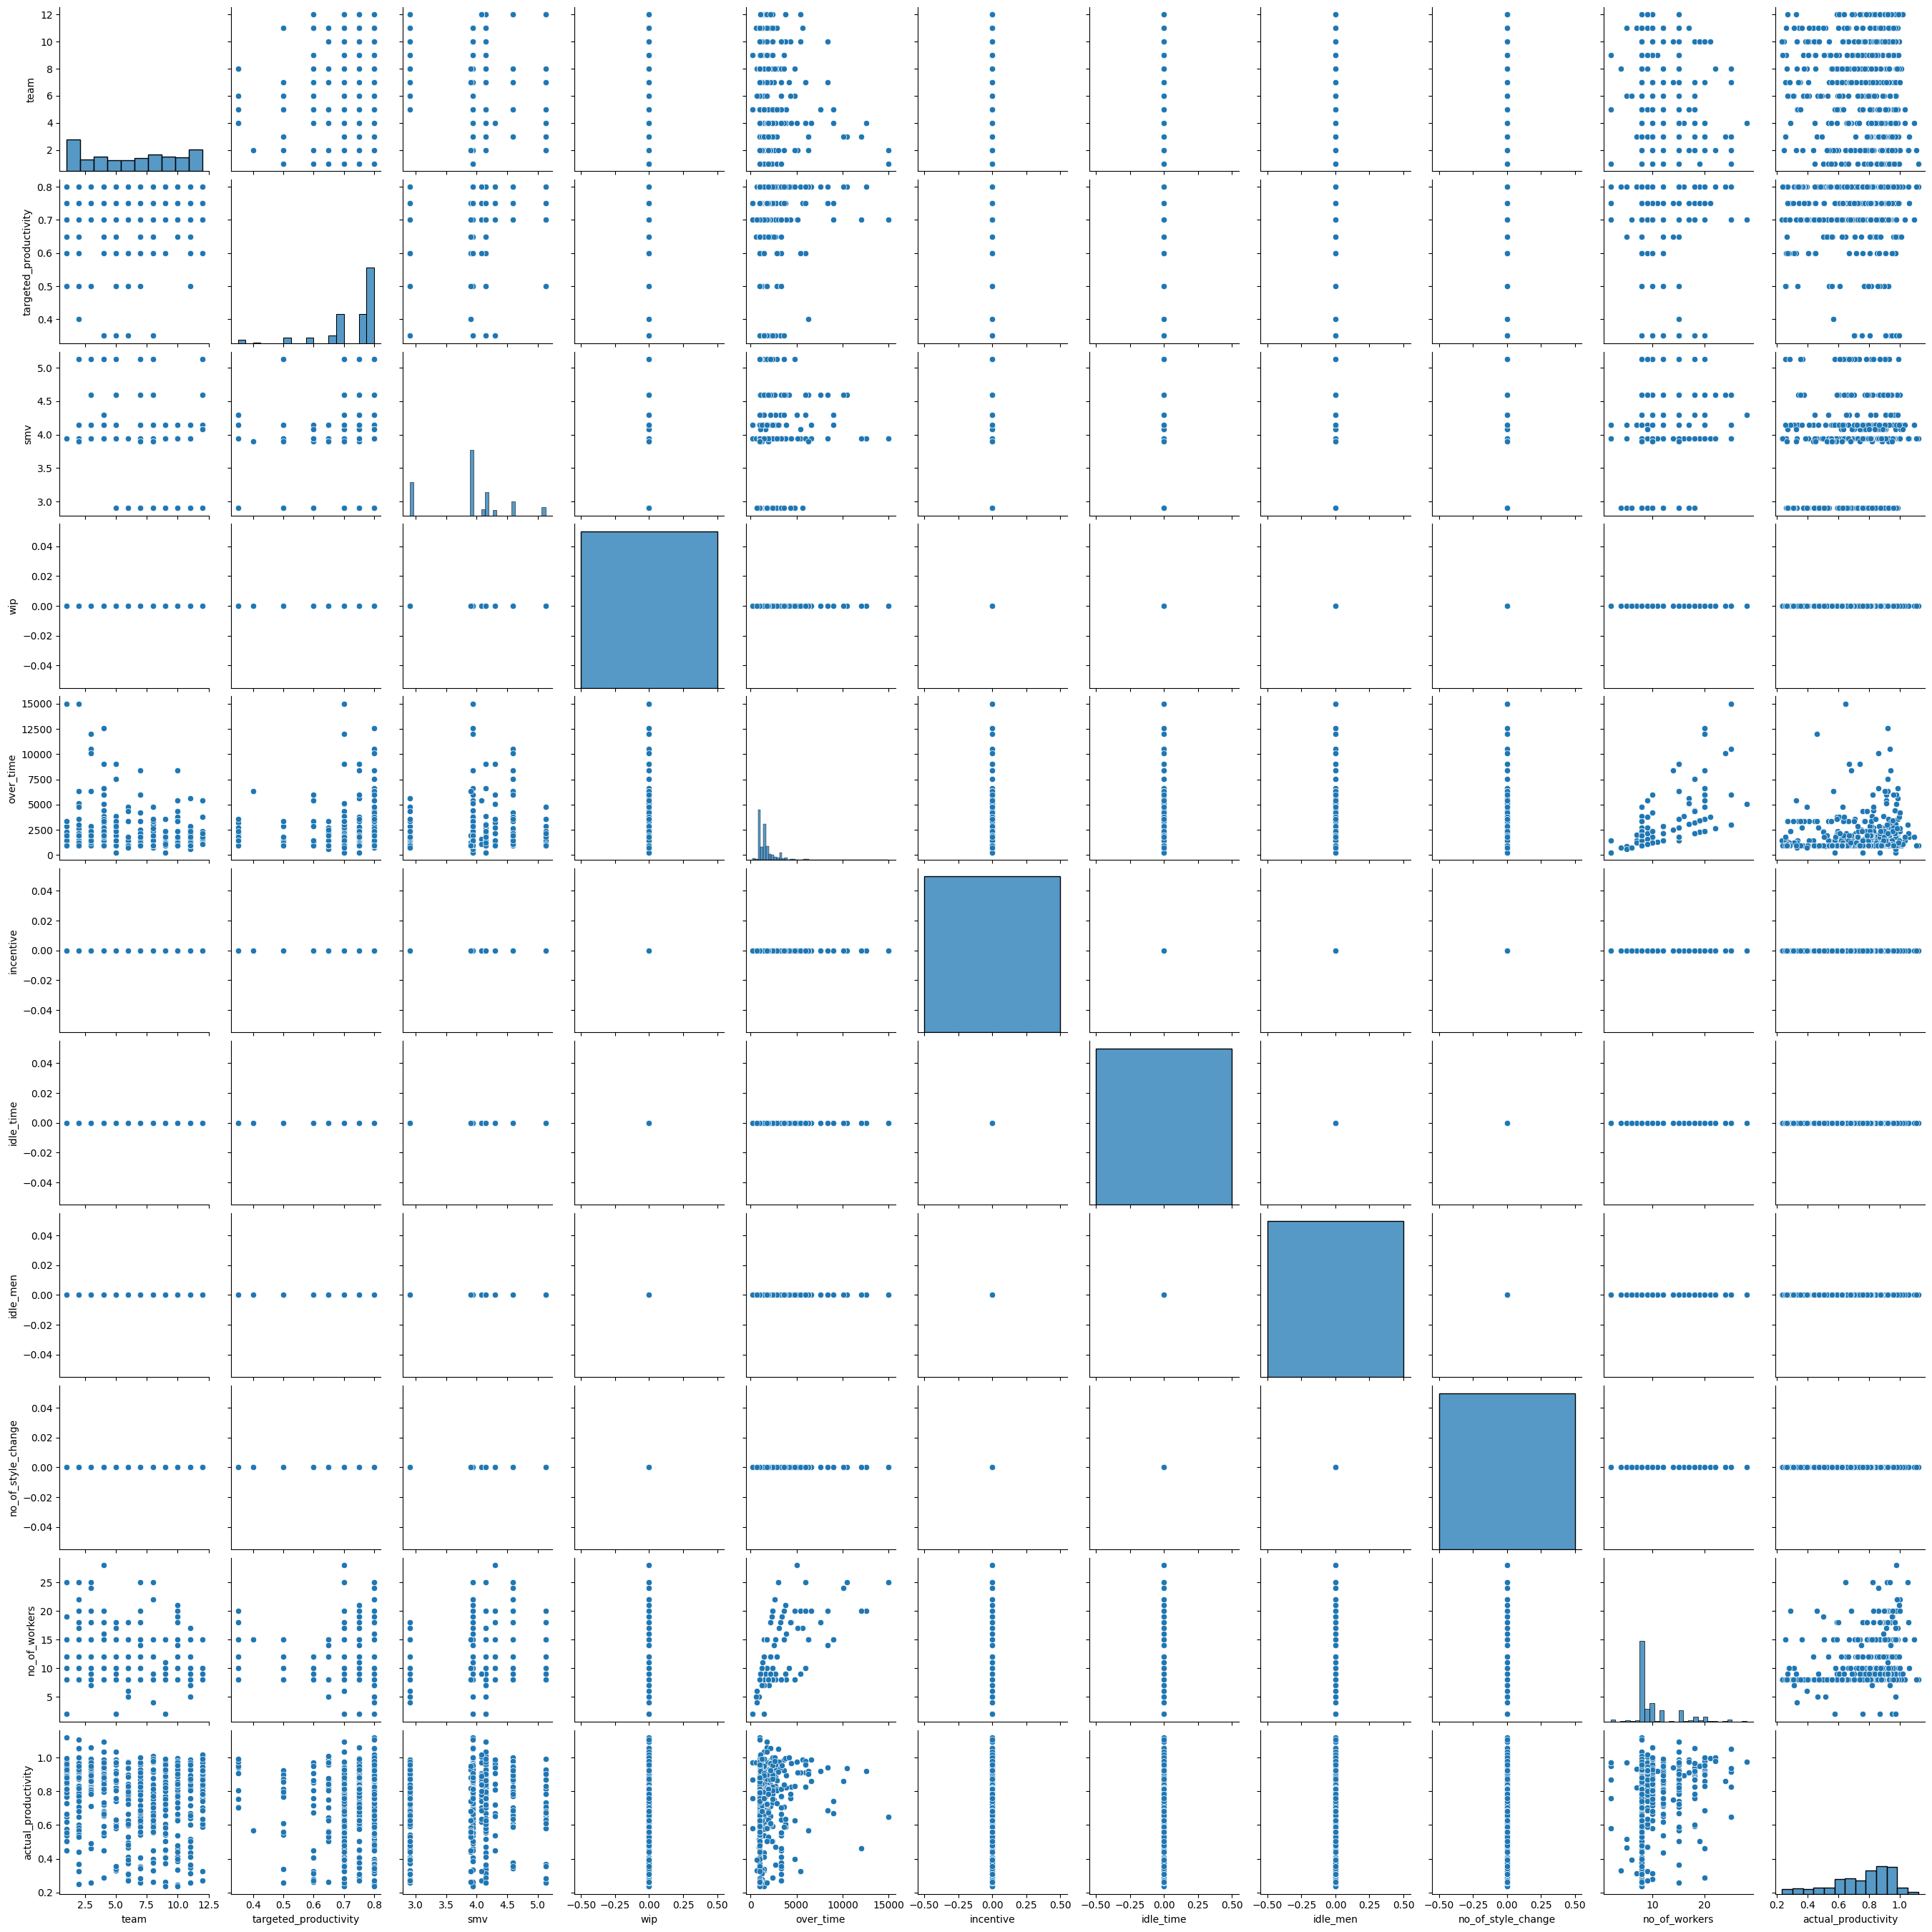

In [326]:
df_val_finishing=df_finishing.select_dtypes(exclude=['object'])
sns.pairplot(df_val_finishing)

<Axes: >

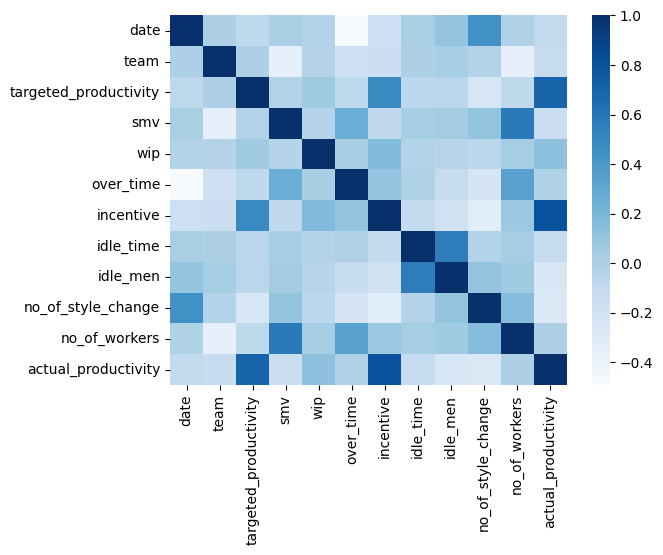

In [310]:
import seaborn as sb
corr_s= df_val_sweing.corr()

sb.heatmap(corr_s, cmap="Blues")


<Axes: >

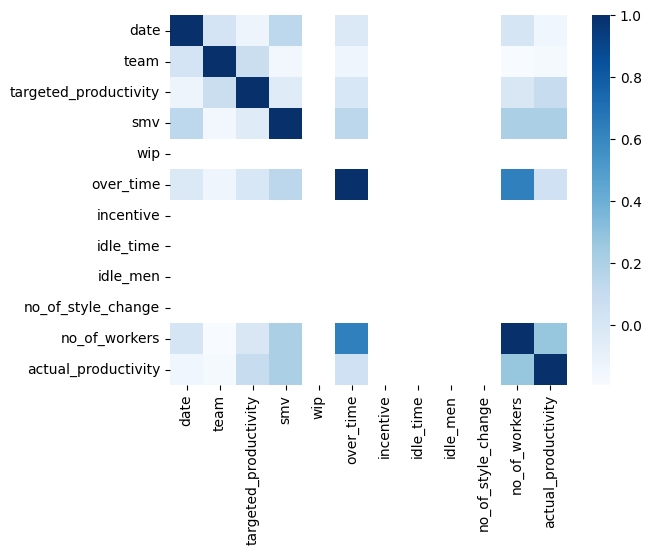

In [311]:
corr_f=df_val_finishing.corr()
sb.heatmap(corr_f, cmap="Blues")

**IMPORTAR LIBRERÍAS**

In [383]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


**MODELOS DE PRUEBA**

**MODELO COMPLETO**

REGRESIÓN LINEAL MÚLTIPLE

In [399]:
#6 VARIABLES INDEPENDIENTES, Y=ACTUAL_PRODUCTIVITY (PARA TODAS LAS ACTIVIDADES)

# Preparar los datos
X = df_fin[['incentive','targeted_productivity','team', 'smv','over_time','no_of_workers']]
y = df_fin['actual_productivity']


# Crear variables dummy para team
X = pd.get_dummies(X, columns=['team'])


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las variables independientes
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Modelo de regresión lineal múltiple con datos estandarizados
linreg = LinearRegression()
linreg.fit(X_train_std, y_train)

# Predecir con datos de prueba estandarizados
y_pred_std = linreg.predict(X_test_std)

# Métricas de evaluación con datos estandarizados
mse_std = mean_squared_error(y_test, y_pred_std)
mae_std = mean_absolute_error(y_test, y_pred_std)
rmse_std = np.sqrt(mse_std)

# Imprimir resultados
print(f"Error cuadrático medio (MSE) del modelo de regresión lineal con datos estandarizados: {mse_std:.4f}")
print(f"El MAE del modelo de regresión lineal con datos estandarizados: {mae_std:.4f}")
print(f"El RMSE del modelo de regresión lineal con datos estandarizados: {rmse_std:.4f}")

Error cuadrático medio (MSE) del modelo de regresión lineal con datos estandarizados: 0.0184
El MAE del modelo de regresión lineal con datos estandarizados: 0.0979
El RMSE del modelo de regresión lineal con datos estandarizados: 0.1356


VALIDACIÓN CRUZADA

In [401]:
#6 VARIABLES INDEPENDIENTES, Y=ACTUAL_PRODUCTIVITY (PARA TODAS LAS ACTIVIDADES)
#VALIDACIÓN CRUZADA 

from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)
print("MSE: ",mse_scores.mean())

# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
print("RMSE: ", rmse_scores.mean())

# Calcular MAE
mae_scores = -cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE Scores: ", mae_scores)
print("MAE: ", mae_scores.mean())

[0.01339592 0.02118746 0.02125692 0.02548844 0.02102973]
MSE:  0.02047169445163085
[0.11574075 0.14555913 0.14579754 0.15965099 0.1450163 ]
RMSE:  0.14235294350519026
MAE Scores:  [0.08564107 0.10299319 0.10707856 0.1167198  0.09925212]
MAE:  0.10233694871347365


REGRESIÓN LOGÍSTICA

In [402]:
# Modelo de regresión logística
#6 VARIABLES INDEPENDIENTES, Y=ACTUAL_PRODUCTIVITY (PARA TODAS LAS ACTIVIDADES)
# Convertir actual_productivity en una variable binaria (-1 = baja productividad, 1 = alta productividad,0 targeted)
y_binary_train = ["alta" if value > 1 else "target" if value == 1 else "baja" for value in y_train]
y_binary_test = ["alta" if value > 1 else "target" if value == 1 else "baja" for value in y_test]

# Modelo de regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_binary_train)
y_pred_log = logreg.predict(X_test)
accuracy = accuracy_score(y_binary_test, y_pred_log)
print(f"Precisión del modelo de regresión logística: {accuracy:.4f}")

Precisión del modelo de regresión logística: 0.9917


c:\Users\gabby\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**MODELO SWEING**

REGRESIÓN LINEAL MÚLTIPLE

In [404]:
#DEPARTMENT SWEING
#6 VARIABLES INDEPENDIENTES, Y=ACTUAL_PRODUCTIVITY 
# Preparar los datos
X = df_sweing[['incentive','targeted_productivity','team', 'smv','over_time','no_of_workers']]
y = df_sweing['actual_productivity']


# Crear variables dummy para team
X = pd.get_dummies(X, columns=['team'])


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las variables independientes
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Modelo de regresión lineal múltiple con datos estandarizados
linreg = LinearRegression()
linreg.fit(X_train_std, y_train)

# Predecir con datos de prueba estandarizados
y_pred_std = linreg.predict(X_test_std)

# Métricas de evaluación con datos estandarizados
mse_std = mean_squared_error(y_test, y_pred_std)
mae_std = mean_absolute_error(y_test, y_pred_std)
rmse_std = np.sqrt(mse_std)

# Imprimir resultados
print(f"Error cuadrático medio (MSE) del modelo de regresión lineal con datos estandarizados: {mse_std:.4f}")
print(f"El MAE del modelo de regresión lineal con datos estandarizados: {mae_std:.4f}")
print(f"El RMSE del modelo de regresión lineal con datos estandarizados: {rmse_std:.4f}")


Error cuadrático medio (MSE) del modelo de regresión lineal con datos estandarizados: 0.0043
El MAE del modelo de regresión lineal con datos estandarizados: 0.0429
El RMSE del modelo de regresión lineal con datos estandarizados: 0.0657


VALIDACIÓN CRUZADA

In [405]:
#SWEING
#6 VARIABLES INDEPENDIENTES, Y=ACTUAL_PRODUCTIVITY 
#VALIDACIÓN CRUZADA 

from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)
print("MSE: ",mse_scores.mean())

# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
print("RMSE: ", rmse_scores.mean())

# Calcular MAE
mae_scores = -cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE Scores: ", mae_scores)
print("MAE: ", mae_scores.mean())

[0.00294748 0.00344688 0.00674231 0.01056911 0.00476554]
MSE:  0.005694264410941263
[0.05429069 0.05871013 0.08211159 0.10280619 0.06903287]
RMSE:  0.0733902944632319
MAE Scores:  [0.03562193 0.03928601 0.05130549 0.07170577 0.0468396 ]
MAE:  0.04895175699992608


REGRESIÓN LOGÍSTICA SWEING

In [406]:
# Modelo de regresión logística
#6 VARIABLES INDEPENDIENTES, Y=ACTUAL_PRODUCTIVITY 
# Convertir actual_productivity en una variable binaria (-1 = baja productividad, 1 = alta productividad,0 targeted)
y_binary_train = ["alta" if value > 1 else "target" if value == 1 else "baja" for value in y_train]
y_binary_test = ["alta" if value > 1 else "target" if value == 1 else "baja" for value in y_test]

# Modelo de regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_binary_train)
y_pred_log = logreg.predict(X_test)
accuracy = accuracy_score(y_binary_test, y_pred_log)
print(f"Precisión del modelo de regresión logística: {accuracy:.4f}")

Precisión del modelo de regresión logística: 0.9784


c:\Users\gabby\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**MODELO FINISHING**

REGRESIÓN LINEAL MÚLTIPLE

In [407]:
#DEPARTMENT FINISHING
#6 VARIABLES INDEPENDIENTES, Y=ACTUAL_PRODUCTIVITY 
# Preparar los datos
X = df_finishing[['incentive','targeted_productivity','team', 'smv','over_time','no_of_workers']]
y = df_finishing['actual_productivity']


# Crear variables dummy para team
X = pd.get_dummies(X, columns=['team'])


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las variables independientes
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Modelo de regresión lineal múltiple con datos estandarizados
linreg = LinearRegression()
linreg.fit(X_train_std, y_train)

# Predecir con datos de prueba estandarizados
y_pred_std = linreg.predict(X_test_std)

# Métricas de evaluación con datos estandarizados
mse_std = mean_squared_error(y_test, y_pred_std)
mae_std = mean_absolute_error(y_test, y_pred_std)
rmse_std = np.sqrt(mse_std)

# Imprimir resultados
print(f"Error cuadrático medio (MSE) del modelo de regresión lineal con datos estandarizados: {mse_std:.4f}")
print(f"El MAE del modelo de regresión lineal con datos estandarizados: {mae_std:.4f}")
print(f"El RMSE del modelo de regresión lineal con datos estandarizados: {rmse_std:.4f}")


Error cuadrático medio (MSE) del modelo de regresión lineal con datos estandarizados: 0.0274
El MAE del modelo de regresión lineal con datos estandarizados: 0.1323
El RMSE del modelo de regresión lineal con datos estandarizados: 0.1656


VALIDACIÓN CRUZADA

In [408]:
#FINISHING
#6 VARIABLES INDEPENDIENTES, Y=ACTUAL_PRODUCTIVITY 
#VALIDACIÓN CRUZADA 

from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)
print("MSE: ",mse_scores.mean())

# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
print("RMSE: ", rmse_scores.mean())

# Calcular MAE
mae_scores = -cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE Scores: ", mae_scores)
print("MAE: ", mae_scores.mean())

[0.0260438  0.03575224 0.04099745 0.04872751 0.03152538]
MSE:  0.03660927527059159
[0.16138092 0.18908262 0.20247826 0.22074309 0.17755388]
RMSE:  0.19024775406277575
MAE Scores:  [0.12576579 0.15302579 0.15722951 0.1714479  0.14321532]
MAE:  0.15013686075704696


REGRESIÓN LOGÍSTICA

In [409]:
# Modelo de regresión logística
#FINISHING
#6 VARIABLES INDEPENDIENTES, Y=ACTUAL_PRODUCTIVITY 
# Convertir actual_productivity en una variable binaria (-1 = baja productividad, 1 = alta productividad,0 targeted)
y_binary_train = ["alta" if value > 1 else "target" if value == 1 else "baja" for value in y_train]
y_binary_test = ["alta" if value > 1 else "target" if value == 1 else "baja" for value in y_test]

# Modelo de regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_binary_train)
y_pred_log = logreg.predict(X_test)
accuracy = accuracy_score(y_binary_test, y_pred_log)
print(f"Precisión del modelo de regresión logística: {accuracy:.4f}")

Precisión del modelo de regresión logística: 0.9902


c:\Users\gabby\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**ÁRBOLES COMPLETO**

In [411]:

import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Supongamos que df_fin es tu DataFrame

# Variables independientes originales
X = df_fin[['incentive', 'targeted_productivity', 'team', 'smv', 'over_time', 'no_of_workers']]

# Variable dependiente
y = df_fin['actual_productivity']

# Crear variables dummy para 'team'
X = pd.get_dummies(X, columns=['team'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuración de parámetros del modelo LightGBM
params = {
    'objective': 'regression',  # Seleccionar el tipo de tarea (regresión)
    'metric': 'mse',  # Métrica de evaluación: Mean Squared Error
    'boosting_type': 'gbdt',  # Tipo de impulso: Gradient Boosting Decision Tree
    'num_leaves': 31,  # Número máximo de nodos hoja en cada árbol
    'learning_rate': 0.05,  # Tasa de aprendizaje
    'feature_fraction': 0.9,  # Fracción de características a considerar en cada árbol
}

# Crear el conjunto de datos de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Entrenar el modelo LightGBM
num_round = 1000  # Número máximo de rondas de entrenamiento
early_stopping_rounds = 10  # Número de rondas sin mejora para detener el entrenamiento
best_iteration = -1
best_mse = float('inf')

for round in range(num_round):
    model = lgb.train(params, train_data, round + 1, valid_sets=[test_data])
    y_pred_lgb = model.predict(X_test)

    mse_lgb = mean_squared_error(y_test, y_pred_lgb)

    if mse_lgb < best_mse:
        best_mse = mse_lgb
        best_iteration = round + 1
    else:
        if round - best_iteration >= early_stopping_rounds:
            #print(f"Deteniendo el entrenamiento en la ronda {round + 1} debido a la falta de mejora.")
            break

# Entrenar el modelo final con el mejor número de rondas
final_model = lgb.train(params, train_data, best_iteration, valid_sets=[test_data])

# Predecir con el conjunto de prueba utilizando el modelo final
y_pred_lgb_final = final_model.predict(X_test)

# Calcular métricas de evaluación
mse_lgb_final = mean_squared_error(y_test, y_pred_lgb_final)
mae_lgb_final = mean_absolute_error(y_test, y_pred_lgb_final)
rmse_lgb_final = np.sqrt(mse_lgb_final)

# Imprimir resultados
print(f"Error cuadrático medio (MSE) del modelo LightGBM: {mse_lgb_final:.4f}")
print(f"El MAE del modelo LightGBM: {mae_lgb_final:.4f}")
print(f"El RMSE del modelo LightGBM: {rmse_lgb_final:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 957, number of used features: 17
[LightGBM] [Info] Start training from score 0.732472
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 957, number of used features: 17
[LightGBM] [Info] Start training from score 0.732472
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 957, 

**ÁRBOLES SWEING**

In [413]:

import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Supongamos que df_fin es tu DataFrame

# Variables independientes originales
X = df_sweing[['incentive', 'targeted_productivity', 'team', 'smv', 'over_time', 'no_of_workers']]

# Variable dependiente
y = df_sweing['actual_productivity']

# Crear variables dummy para 'team'
X = pd.get_dummies(X, columns=['team'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuración de parámetros del modelo LightGBM
params = {
    'objective': 'regression',  # Seleccionar el tipo de tarea (regresión)
    'metric': 'mse',  # Métrica de evaluación: Mean Squared Error
    'boosting_type': 'gbdt',  # Tipo de impulso: Gradient Boosting Decision Tree
    'num_leaves': 31,  # Número máximo de nodos hoja en cada árbol
    'learning_rate': 0.05,  # Tasa de aprendizaje
    'feature_fraction': 0.9,  # Fracción de características a considerar en cada árbol
}

# Crear el conjunto de datos de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Entrenar el modelo LightGBM
num_round = 1000  # Número máximo de rondas de entrenamiento
early_stopping_rounds = 10  # Número de rondas sin mejora para detener el entrenamiento
best_iteration = -1
best_mse = float('inf')

for round in range(num_round):
    model = lgb.train(params, train_data, round + 1, valid_sets=[test_data])
    y_pred_lgb = model.predict(X_test)

    mse_lgb = mean_squared_error(y_test, y_pred_lgb)

    if mse_lgb < best_mse:
        best_mse = mse_lgb
        best_iteration = round + 1
    else:
        if round - best_iteration >= early_stopping_rounds:
            #print(f"Deteniendo el entrenamiento en la ronda {round + 1} debido a la falta de mejora.")
            break

# Entrenar el modelo final con el mejor número de rondas
final_model = lgb.train(params, train_data, best_iteration, valid_sets=[test_data])

# Predecir con el conjunto de prueba utilizando el modelo final
y_pred_lgb_final = final_model.predict(X_test)

# Calcular métricas de evaluación
mse_lgb_final = mean_squared_error(y_test, y_pred_lgb_final)
mae_lgb_final = mean_absolute_error(y_test, y_pred_lgb_final)
rmse_lgb_final = np.sqrt(mse_lgb_final)

# Imprimir resultados
print(f"Error cuadrático medio (MSE) del modelo LightGBM: {mse_lgb_final:.4f}")
print(f"El MAE del modelo LightGBM: {mae_lgb_final:.4f}")
print(f"El RMSE del modelo LightGBM: {rmse_lgb_final:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 17
[LightGBM] [Info] Start training from score 0.719866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 17
[LightGBM] [Info] Start training from score 0.719866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 se

**ÁRBOLES FINISHING**

In [414]:

import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Supongamos que df_fin es tu DataFrame

# Variables independientes originales
X = df_finishing[['incentive', 'targeted_productivity', 'team', 'smv', 'over_time', 'no_of_workers']]

# Variable dependiente
y = df_finishing['actual_productivity']

# Crear variables dummy para 'team'
X = pd.get_dummies(X, columns=['team'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuración de parámetros del modelo LightGBM
params = {
    'objective': 'regression',  # Seleccionar el tipo de tarea (regresión)
    'metric': 'mse',  # Métrica de evaluación: Mean Squared Error
    'boosting_type': 'gbdt',  # Tipo de impulso: Gradient Boosting Decision Tree
    'num_leaves': 31,  # Número máximo de nodos hoja en cada árbol
    'learning_rate': 0.05,  # Tasa de aprendizaje
    'feature_fraction': 0.9,  # Fracción de características a considerar en cada árbol
}

# Crear el conjunto de datos de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Entrenar el modelo LightGBM
num_round = 1000  # Número máximo de rondas de entrenamiento
early_stopping_rounds = 10  # Número de rondas sin mejora para detener el entrenamiento
best_iteration = -1
best_mse = float('inf')

for round in range(num_round):
    model = lgb.train(params, train_data, round + 1, valid_sets=[test_data])
    y_pred_lgb = model.predict(X_test)

    mse_lgb = mean_squared_error(y_test, y_pred_lgb)

    if mse_lgb < best_mse:
        best_mse = mse_lgb
        best_iteration = round + 1
    else:
        if round - best_iteration >= early_stopping_rounds:
            #print(f"Deteniendo el entrenamiento en la ronda {round + 1} debido a la falta de mejora.")
            break

# Entrenar el modelo final con el mejor número de rondas
final_model = lgb.train(params, train_data, best_iteration, valid_sets=[test_data])

# Predecir con el conjunto de prueba utilizando el modelo final
y_pred_lgb_final = final_model.predict(X_test)

# Calcular métricas de evaluación
mse_lgb_final = mean_squared_error(y_test, y_pred_lgb_final)
mae_lgb_final = mean_absolute_error(y_test, y_pred_lgb_final)
rmse_lgb_final = np.sqrt(mse_lgb_final)

# Imprimir resultados
print(f"Error cuadrático medio (MSE) del modelo LightGBM: {mse_lgb_final:.4f}")
print(f"El MAE del modelo LightGBM: {mae_lgb_final:.4f}")
print(f"El RMSE del modelo LightGBM: {rmse_lgb_final:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 16
[LightGBM] [Info] Start training from score 0.758214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 16
[LightGBM] [Info] Start training from score 0.758214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col

**GLM COMPLETO**

In [412]:
import statsmodels.api as sm


# Variables independientes originales
X = df_fin[['incentive', 'targeted_productivity', 'team', 'smv', 'over_time', 'no_of_workers']]

# Variable dependiente
y = df_fin['actual_productivity']

# Crear variables dummy para 'team'
X = pd.get_dummies(X, columns=['team'],dtype=int)



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añadir una columna constante al conjunto de entrenamiento (intercepto)
X_train = sm.add_constant(X_train)

# Crear el modelo GLM
model = sm.GLM(y_train, X_train, family=sm.families.Gaussian())

# Ajustar el modelo
result = model.fit()

# Resumen del modelo
print(result.summary())

# Predecir con el conjunto de prueba
X_test = sm.add_constant(X_test)
y_pred_glm = result.predict(X_test)

# Calcular métricas de evaluación
mse_glm = mean_squared_error(y_test, y_pred_glm)
mae_glm = mean_absolute_error(y_test, y_pred_glm)
rmse_glm = np.sqrt(mse_glm)

# Imprimir resultados
print(f"Error cuadrático medio (MSE) del modelo GLM: {mse_glm:.4f}")
print(f"El MAE del modelo GLM: {mae_glm:.4f}")
print(f"El RMSE del modelo GLM: {rmse_glm:.4f}")


                  Generalized Linear Model Regression Results                  
Dep. Variable:     actual_productivity   No. Observations:                  957
Model:                             GLM   Df Residuals:                      940
Model Family:                 Gaussian   Df Model:                           16
Link Function:                Identity   Scale:                        0.019727
Method:                           IRLS   Log-Likelihood:                 529.12
Date:                 Sun, 10 Mar 2024   Deviance:                       18.544
Time:                         13:09:12   Pearson chi2:                     18.5
No. Iterations:                      3   Pseudo R-squ. (CS):             0.4552
Covariance Type:             nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               